In [268]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from functools import partial
warnings.filterwarnings("ignore")

In [269]:
#loading data
df=pd.read_csv("cardata.csv",)
df

,Unnamed: 0,Model,Price,Year,kilo meter,Fuel Type,Transmission,Place,Color,NUmer of Owner,Insurance,Life Time Tax
0,0,2015 Hyundai Grand i10Sportz (O) 1.2 Kappa VTV...,₹ 3.7 Lakh,Jun 2015,"54,000 km",Petrol,Manual,"Sector 10, Noida",Grey,First,Comprehensive,Individual
1,1,2016 Maruti Suzuki Swift DZireVXI,₹ 4.5 Lakh,Sep 2016,"67,941 km",Petrol + Cng,Manual,"Sector 10, Noida",Grey,Second,"Comprehensive , till 24 Nov 2021",Individual
2,2,2012 Audi Q73.0 TDI quattro Premium,₹ 19.5 Lakh,Jun 2012,"98,000 km",Diesel,Automatic,"Ashok Vihar, Delhi",White,First,Not Available,Individual
3,3,2021 Ford EndeavourTitanium Plus 2.2 4x2 AT,₹ 36.91 Lakh,Jun 2021,"2,000 km",Diesel,Automatic,"Karol Bagh, Delhi",Black,First,Comprehensive,Individual
4,4,2012 Maruti Suzuki Wagon RVXi,₹ 2.6 Lakh,Jun 2012,"39,000 km",Petrol,Manual,"Preet Vihar, Delhi",Silver,First,Comprehensive,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...
6379,6379,2015 Mahindra QuantoC4,₹ 3.5 Lakh,Jun 2015,"76,000 km",Diesel,Manual,"Doranda, Ranchi",White,First,Not Available,Individual
6380,6380,2017 Maruti Suzuki Wagon RVXI AMT (O),₹ 3.55 Lakh,Jun 2017,"35,442 km",Petrol,Automatic,"Church Complex, Ranchi",White,Second,"Comprehensive , till 22 Sep 2021",Individual
6381,6381,2005 Hyundai SantroXO eRLX - Euro III,"₹ 85,000",Jun 2005,"85,000 km",Petrol,Manual,"Doranda, Ranchi",Blue,First,Not Available,Individual
6382,6382,2012 Maruti Suzuki AltoLXi BS-III,₹ 1.5 Lakh,Jun 2012,"62,000 km",Petrol,Manual,"Doranda, Ranchi",Silver,First,Not Available,Individual


# Data Preprocessing

In [270]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df["Month"]=[x.split()[0] for x in df["Year"]]
df["Brand"]=[x[5:] for x in df["Model"]]
df.drop("Model",axis=1,inplace=True)
df["Year"]=[x.split()[-1] for x in df["Year"]]
df["Price"]=[x[:-5] for x in df["Price"]]
df["Price"]=[x[1:] for x in df["Price"]]
df["kilo meter"]=[x.split()[0] for x in df["kilo meter"]]
df["Place"]=[x.split()[-1] for x in df["Place"]]
df["Insurance"]=[x.split()[0] for x in df["Insurance"]]

In [271]:
#checking for null values
df.isnull().sum()

Price             0
Year              0
kilo meter        0
Fuel Type         0
Transmission      0
Place             0
Color             0
NUmer of Owner    0
Insurance         0
Life Time Tax     0
Month             0
Brand             0
dtype: int64

In [272]:
#there is no null value:

In [273]:

#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

Price              645
Year                30
kilo meter        1548
Fuel Type           21
Transmission         3
Place               38
Color              205
NUmer of Owner       7
Insurance            6
Life Time Tax        6
Month               13
Brand             1557
dtype: int64

In [274]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           6384 non-null   object
 1   Year            6384 non-null   object
 2   kilo meter      6384 non-null   object
 3   Fuel Type       6384 non-null   object
 4   Transmission    6384 non-null   object
 5   Place           6384 non-null   object
 6   Color           6384 non-null   object
 7   NUmer of Owner  6384 non-null   object
 8   Insurance       6384 non-null   object
 9   Life Time Tax   6384 non-null   object
 10  Month           6384 non-null   object
 11  Brand           6384 non-null   object
dtypes: object(12)
memory usage: 598.6+ KB


In [275]:
# all data types are in object, we need to convert few in int and float data types.

In [276]:
#Checking unique values:
for col in df:
    print(col)
    print(df[col].value_counts())
    print()

Price
          937
 4.5      102
 4.25      92
 5.5       90
 3.5       87
         ... 
 18.45      1
 23.75      1
 19.45      1
 10.41      1
 5.58       1
Name: Price, Length: 645, dtype: int64

Year
--      937
2017    656
2016    654
2018    592
2015    576
2014    554
2012    432
2013    423
2019    387
2011    329
2010    204
2020    188
2009    126
2021     85
2008     81
2007     64
2006     39
2005     17
2004     15
1998      5
2002      4
2003      3
1988      3
1991      2
1994      2
1999      2
1995      1
1996      1
1997      1
2000      1
Name: Year, dtype: int64

kilo meter
--          937
65,000      150
70,000       83
55,000       80
80,000       77
           ... 
1,23,744      1
3,800         1
75,005        1
32,770        1
1,29,108      1
Name: kilo meter, Length: 1548, dtype: int64

Fuel Type
Diesel              2745
Petrol              2163
--                   937
Petrol + Petrol      204
Diesel + Diesel      197
Petrol + Cng          41
CNG + Cng       

In [277]:
#removing empty rows:
df = df[df.Year != "--"]


In [278]:
df["kilo meter"]=[x.replace(",","") for x in df["kilo meter"]]

In [279]:
#converting boject to numeric data
df["Year"]=df["Year"].apply(partial(pd.to_numeric, errors='ignore'))
df["Price"]=df["Price"].apply(partial(pd.to_numeric, errors='ignore'))
df["kilo meter"]=df["kilo meter"].apply(partial(pd.to_numeric, errors='ignore'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5447 entries, 0 to 6383
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           5447 non-null   float64
 1   Year            5447 non-null   int64  
 2   kilo meter      5447 non-null   int64  
 3   Fuel Type       5447 non-null   object 
 4   Transmission    5447 non-null   object 
 5   Place           5447 non-null   object 
 6   Color           5447 non-null   object 
 7   NUmer of Owner  5447 non-null   object 
 8   Insurance       5447 non-null   object 
 9   Life Time Tax   5447 non-null   object 
 10  Month           5447 non-null   object 
 11  Brand           5447 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 553.2+ KB


In [280]:
df["Brand"]=[x.split()[0] for x in df["Brand"]]

# EDA

<AxesSubplot:xlabel='Fuel Type', ylabel='count'>

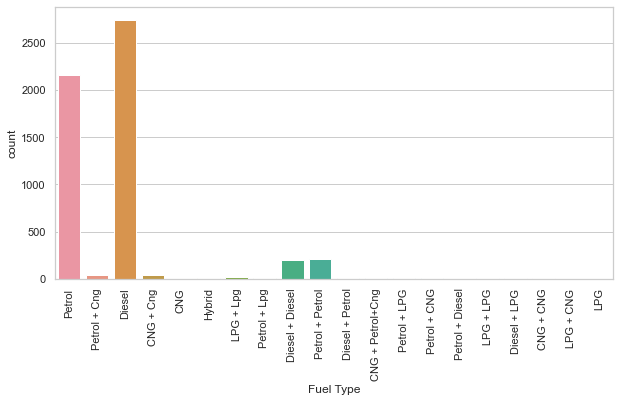

In [281]:
#Fuel Trype
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("Fuel Type", data=df)

In [ ]:
# The number of cars with diesel option in more followed by Petrol

<AxesSubplot:xlabel='Transmission', ylabel='count'>

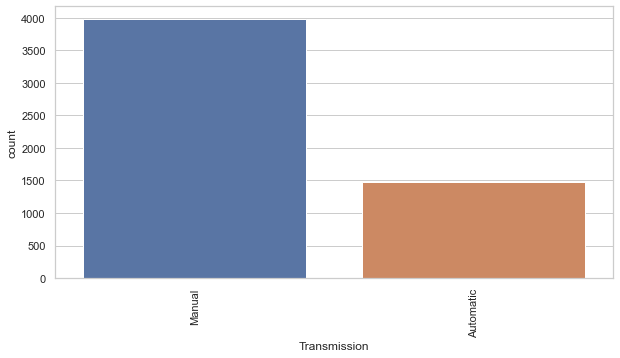

In [282]:
#Transmission
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("Transmission", data=df)

In [ ]:
# Manual Transmission is more availale

<AxesSubplot:xlabel='Place', ylabel='count'>

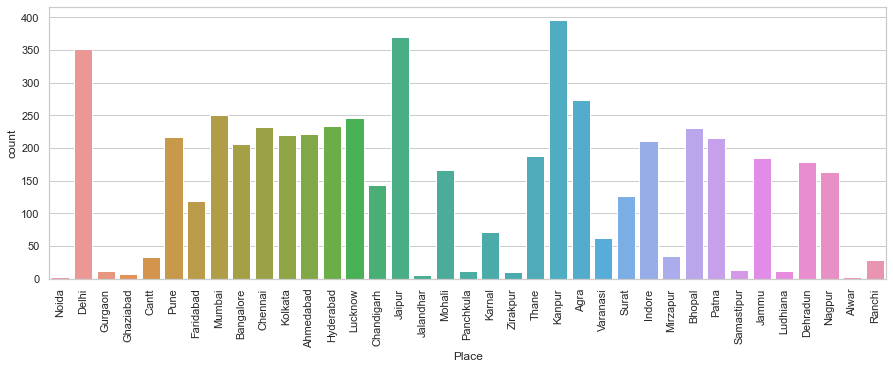

In [283]:
#Place
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot("Place", data=df)

In [ ]:
# NOida, Jaipur and Kanpur has highest number of cars listed for sale

<AxesSubplot:xlabel='Color', ylabel='count'>

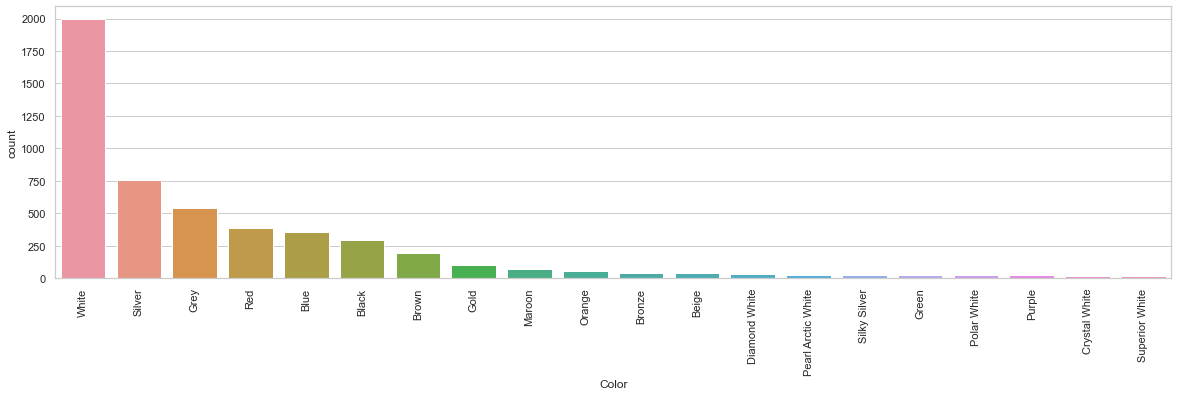

In [284]:
#Color
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot("Color", data=df,order=df.Color.value_counts().iloc[:20].index)

In [ ]:
# Most of the cars are available in white followed by Silver

<AxesSubplot:xlabel='NUmer of Owner', ylabel='count'>

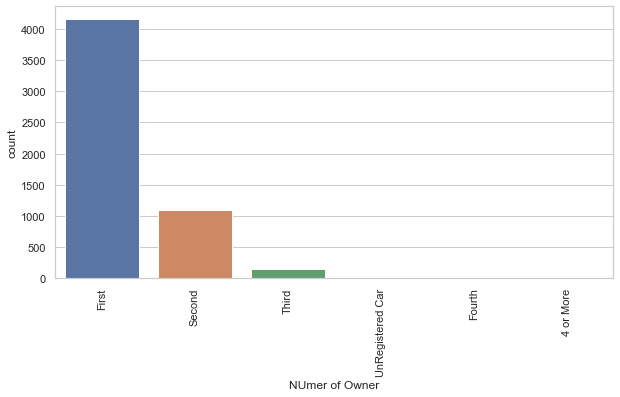

In [285]:
#Numer of Owner
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("NUmer of Owner", data=df)

In [ ]:
# Most cars are fist hand 

<AxesSubplot:xlabel='Insurance', ylabel='count'>

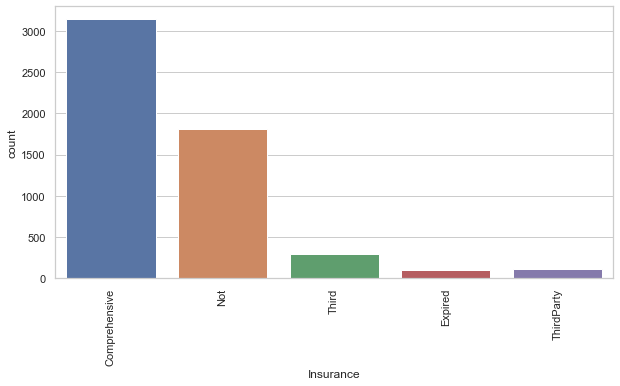

In [286]:
#Insurance
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("Insurance", data=df)

In [ ]:
#Most Cars have Comprehensive insurance while alot of cars doesnt come with insurance

<AxesSubplot:xlabel='Life Time Tax ', ylabel='count'>

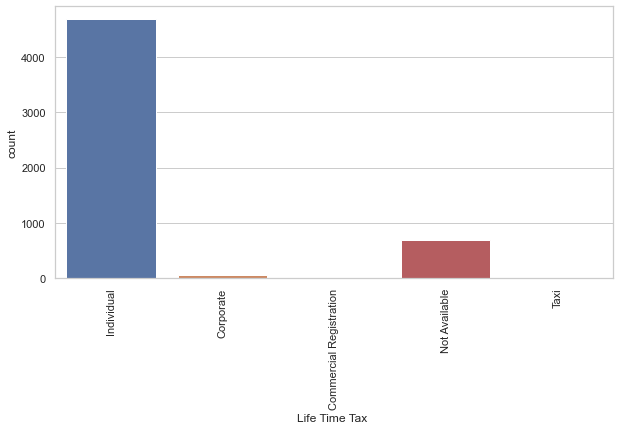

In [287]:
#Life Time Tax
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("Life Time Tax ", data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

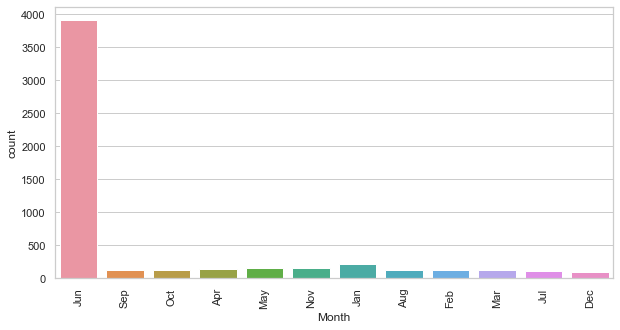

In [288]:
#Month
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot("Month", data=df)

In [ ]:
#majority of cars are listed in june

<AxesSubplot:xlabel='Brand', ylabel='count'>

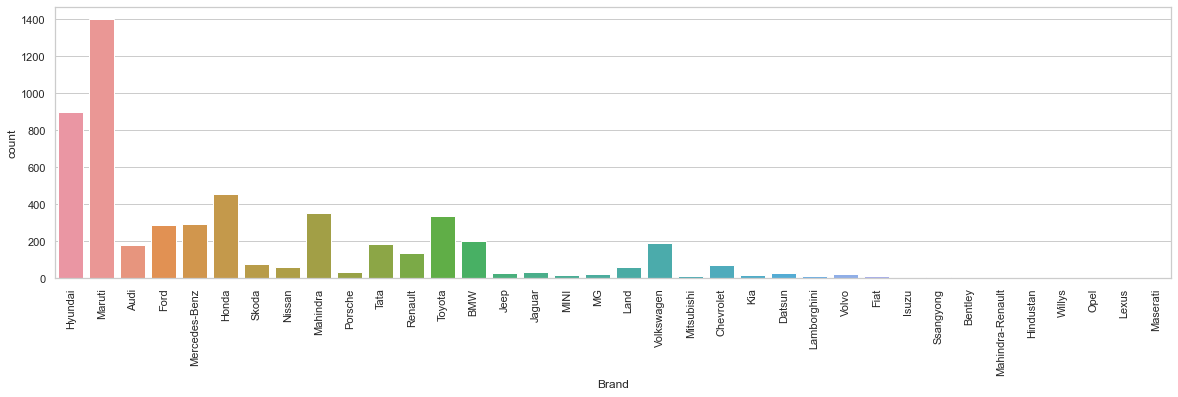

In [289]:
#Brand
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot("Brand", data=df)

In [ ]:
#Maruti cars are most listed cars followed by Hyundai

In [ ]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

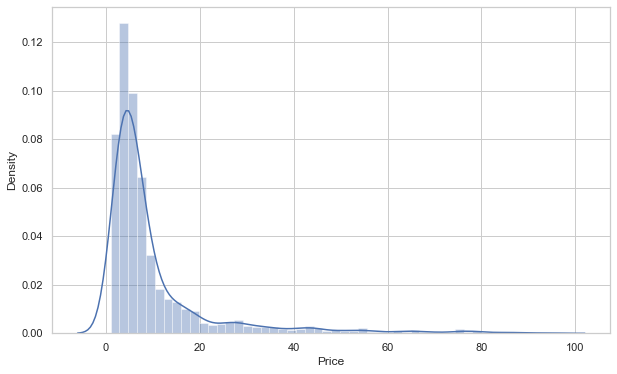

In [291]:
#SeniorCitizen
histogram(df,"Price")

In [ ]:
#Majority of cars are lsited below 20 lakh 

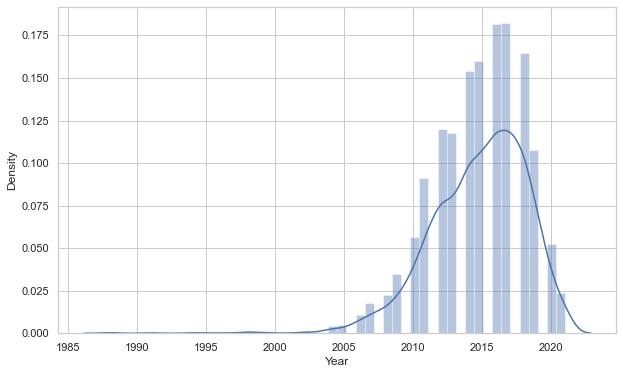

In [292]:
#SeniorCitizen
histogram(df,"Year")

In [ ]:
#Majority of cars model are between 2010-2017

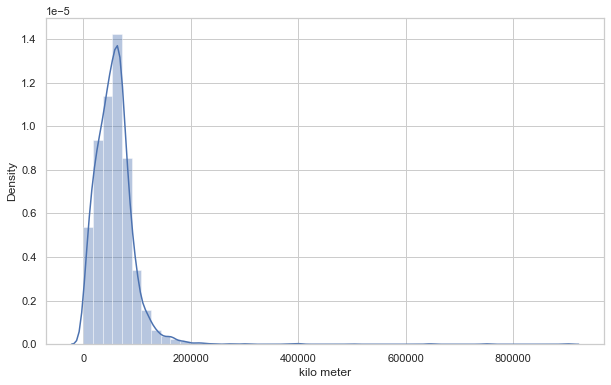

In [293]:
#SeniorCitizen
histogram(df,"kilo meter")

In [ ]:
#Very Few Cars HAs been used above 20k Kilometer

<Figure size 1440x576 with 0 Axes>

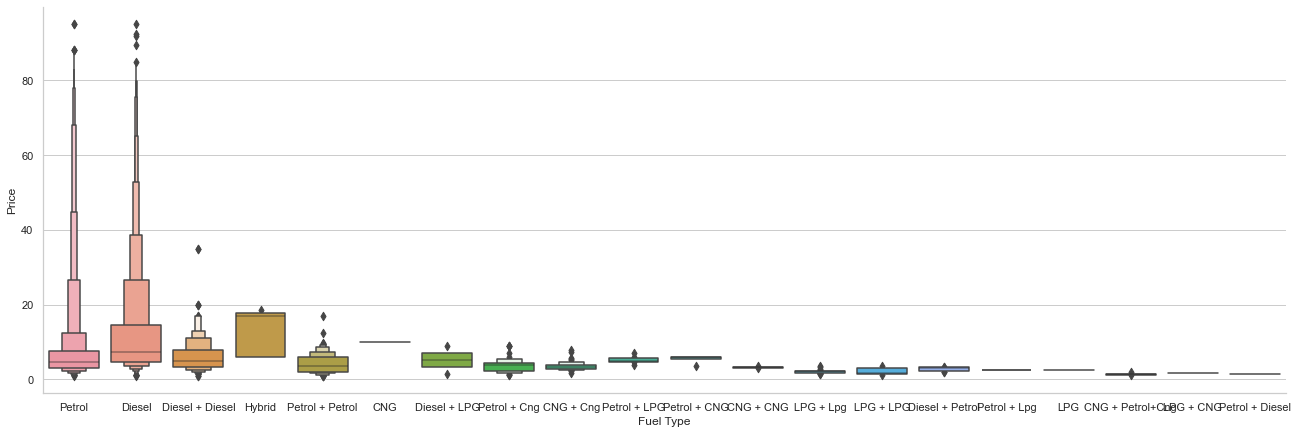

In [294]:
#Price/Fuel Type
plt.figure(figsize=(20,8))
sns.catplot(y = "Price", x = "Fuel Type", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
# Diseal and Petrol fuel type has higher price in comparion to others

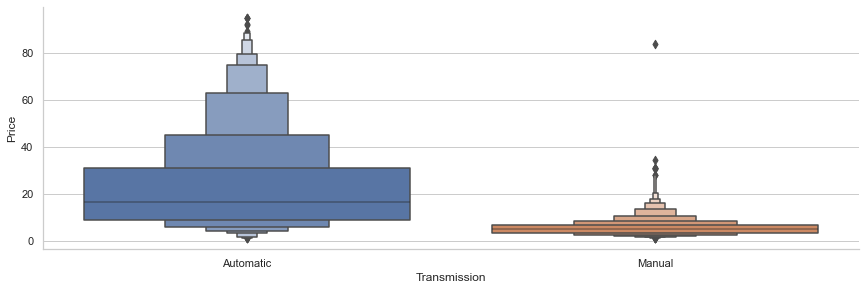

In [295]:
#Price/Transmission
sns.catplot(y = "Price", x = "Transmission", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
##Automatic cars are more pricey than Manual. 

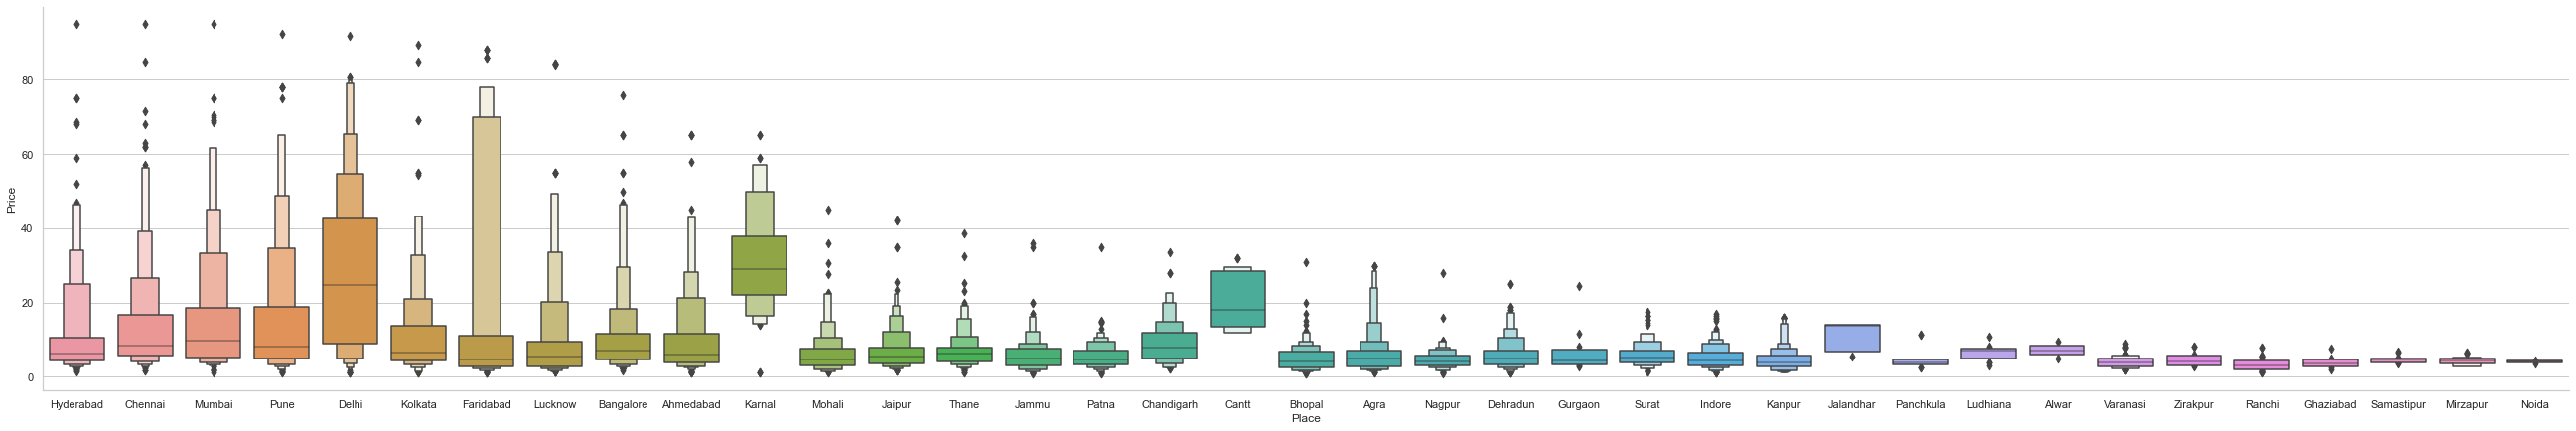

In [296]:
#Price/Place
sns.catplot(y = "Price", x = "Place", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

In [ ]:
#The average price of Delhi is higher than others
# There are cars in hydrabad and chennai whose price is heighst

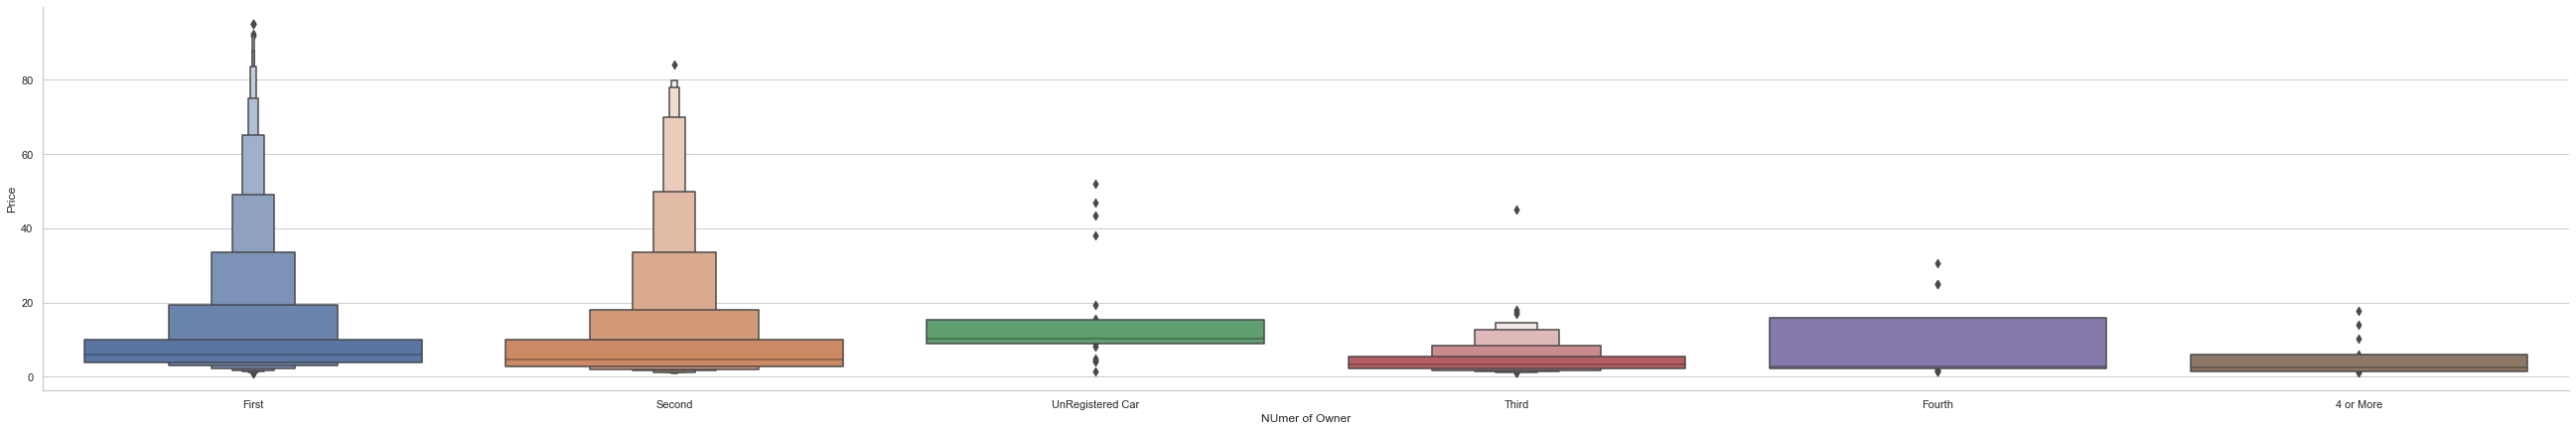

In [297]:
#Price/Number of owner
sns.catplot(y = "Price", x = "NUmer of Owner", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

In [ ]:
#the price starts decrising as the number of owners starts increasing.

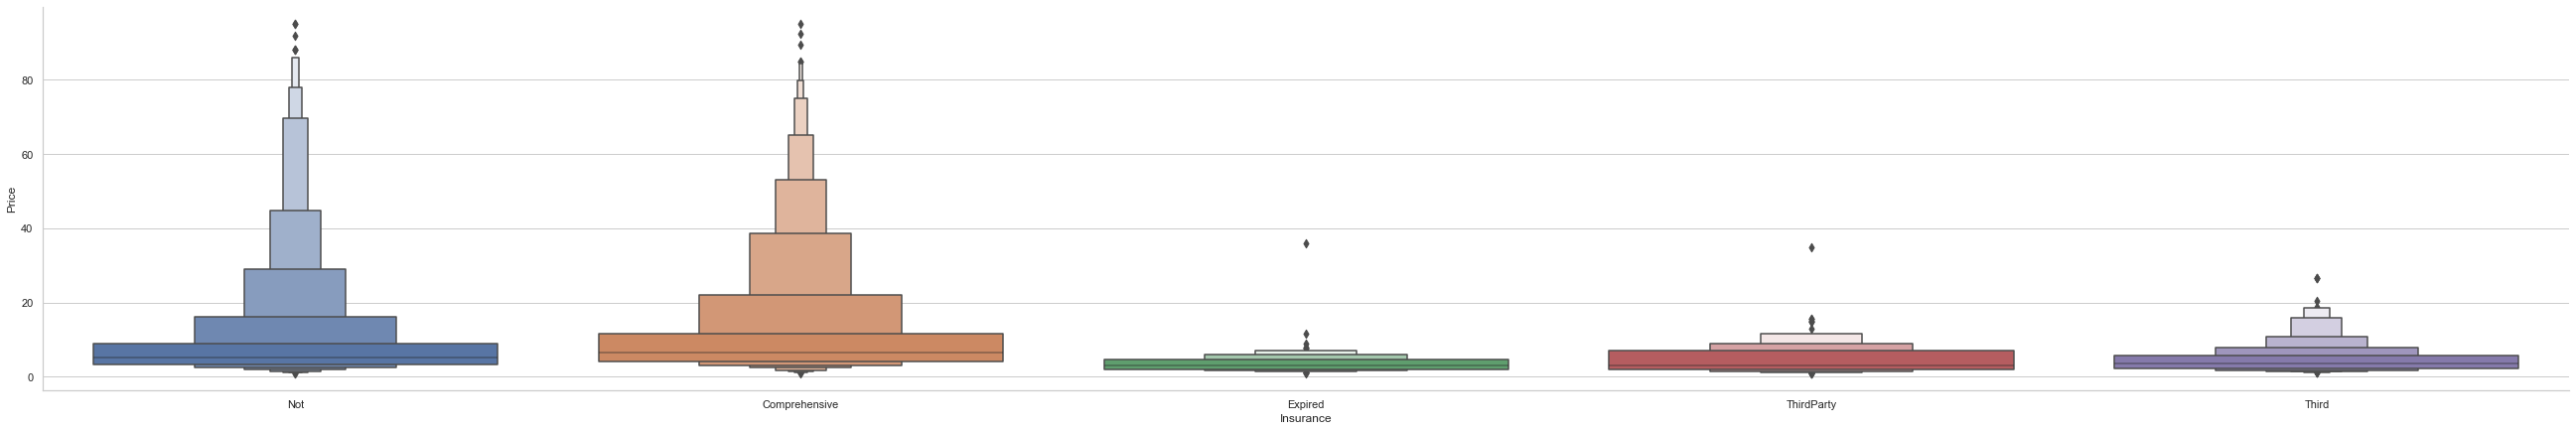

In [298]:
# Price/Insurance
sns.catplot(y = "Price", x = "Insurance", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

In [ ]:
## Third Party and expired insurance has very less value

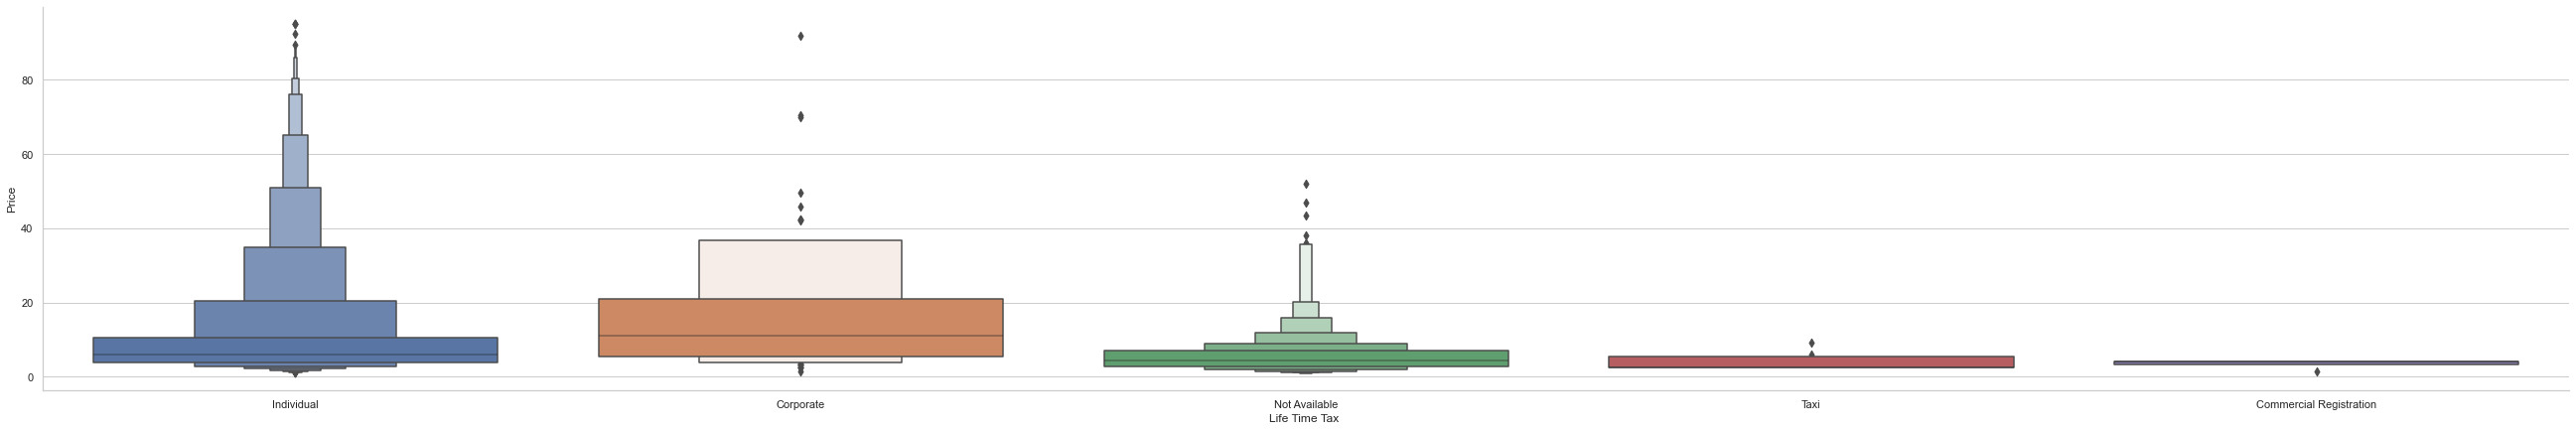

In [299]:
#Price/LifeTimeTax
sns.catplot(y = "Price", x = "Life Time Tax ", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

In [ ]:
#Individual life time tax has more value 

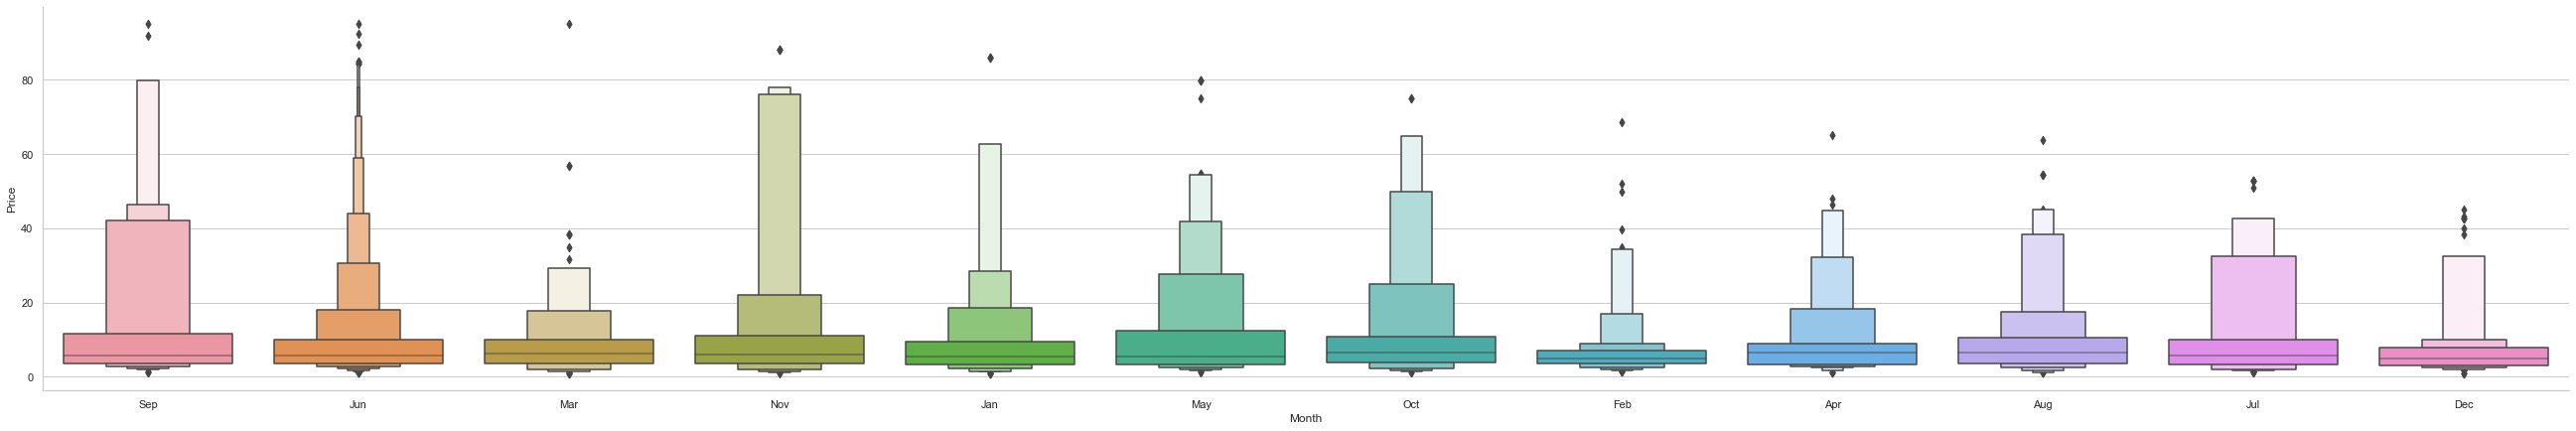

In [300]:
#Price/Month
sns.catplot(y = "Price", x = "Month", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

In [ ]:
#The price in september and Jan is high

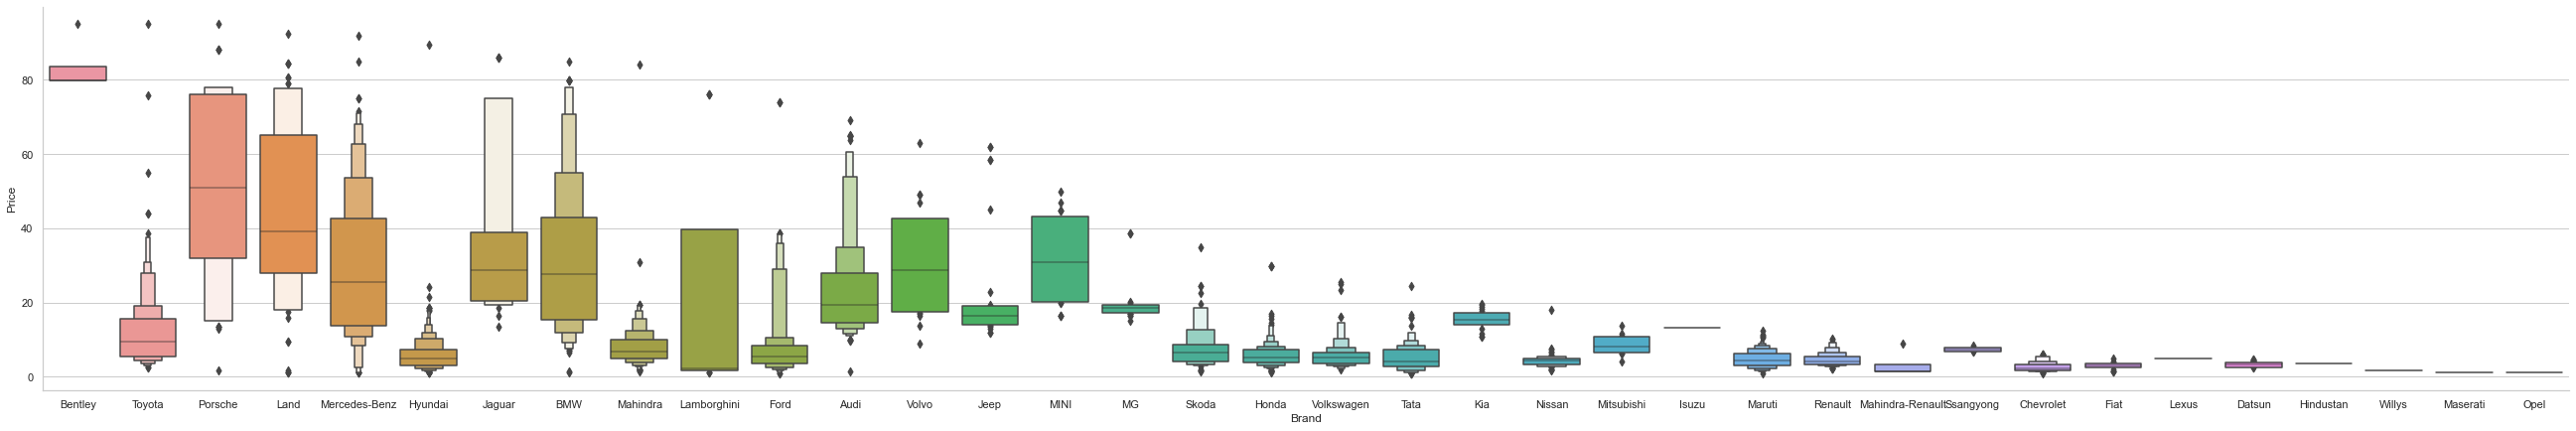

In [301]:
###Price/Brand
sns.catplot(y = "Price", x = "Brand", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

In [ ]:
#Bentely has highest Price but it is few in numbers
#Toyota,Porsche and land rover are high price brands

Text(0, 0.5, 'Year')

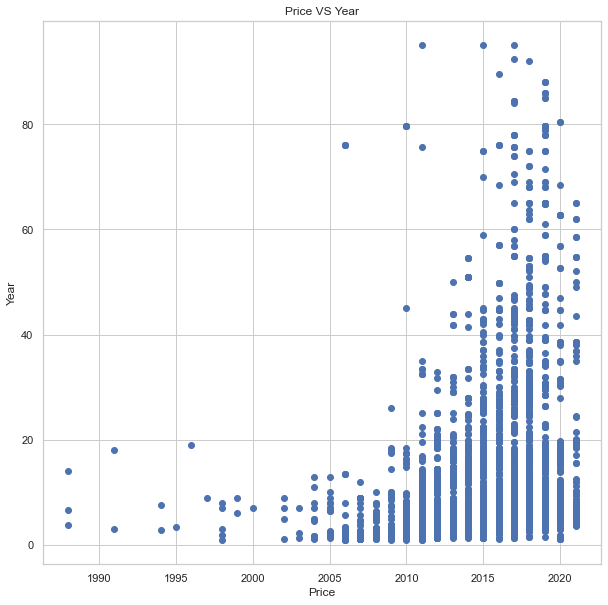

In [302]:
#price/Year
plt.figure(figsize = (10, 10))
plt.title('Price VS Year')
plt.scatter(x='Year', y='Price',data=df)
plt.xlabel('Price')
plt.ylabel('Year')

In [ ]:
## Latest the model Highest the price

Text(0, 0.5, 'Price')

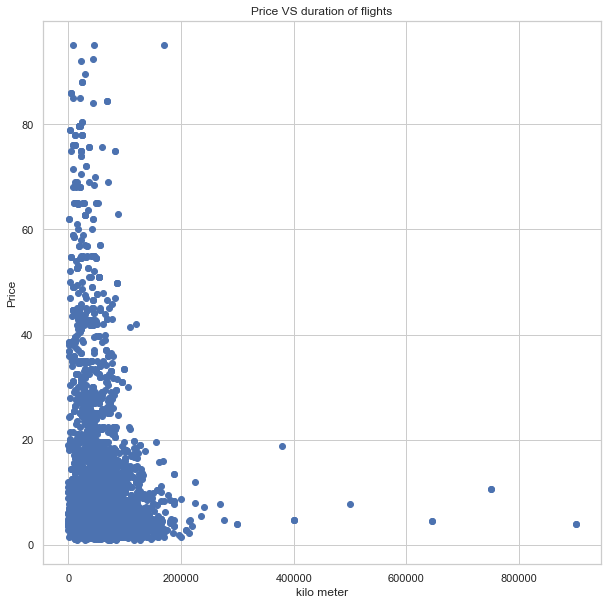

In [303]:
#Price/KiloMeter
plt.figure(figsize = (10, 10))
plt.scatter(x='kilo meter', y='Price',data=df)
plt.xlabel('kilo meter')
plt.ylabel('Price')

In [ ]:
## the less driven car has more value

In [304]:
#Encoding features
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df["Fuel Type"]=encoder.fit_transform(df['Fuel Type'])
df["Transmission"]=encoder.fit_transform(df['Transmission'])
df["Place"]=encoder.fit_transform(df['Place'])
df["Color"]=encoder.fit_transform(df['Color'])
df["NUmer of Owner"]=encoder.fit_transform(df['NUmer of Owner'])
df["Insurance"]=encoder.fit_transform(df['Insurance'])
df["Life Time Tax "]=encoder.fit_transform(df['Life Time Tax '])
df["Month"]=encoder.fit_transform(df['Month'])
df["Brand"]=encoder.fit_transform(df['Brand'])



In [305]:
df

,Price,Year,kilo meter,Fuel Type,Transmission,Place,Color,NUmer of Owner,Insurance,Life Time Tax,Month,Brand
0,3.70,2015,54000,13,1,27,74,1,0,2,6,9
1,4.50,2016,67941,15,1,27,74,3,0,2,11,21
2,19.50,2012,98000,4,0,9,196,1,2,2,6,0
3,36.91,2021,2000,4,0,9,15,1,0,2,6,6
4,2.60,2012,39000,13,1,9,165,1,0,2,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...
6379,3.50,2015,76000,4,1,31,196,1,2,2,6,19
6380,3.55,2017,35442,13,0,31,196,3,0,2,6,21
6381,8.00,2005,85000,13,1,31,19,1,2,2,6,9
6382,1.50,2012,62000,13,1,31,165,1,2,2,6,21


<AxesSubplot:>

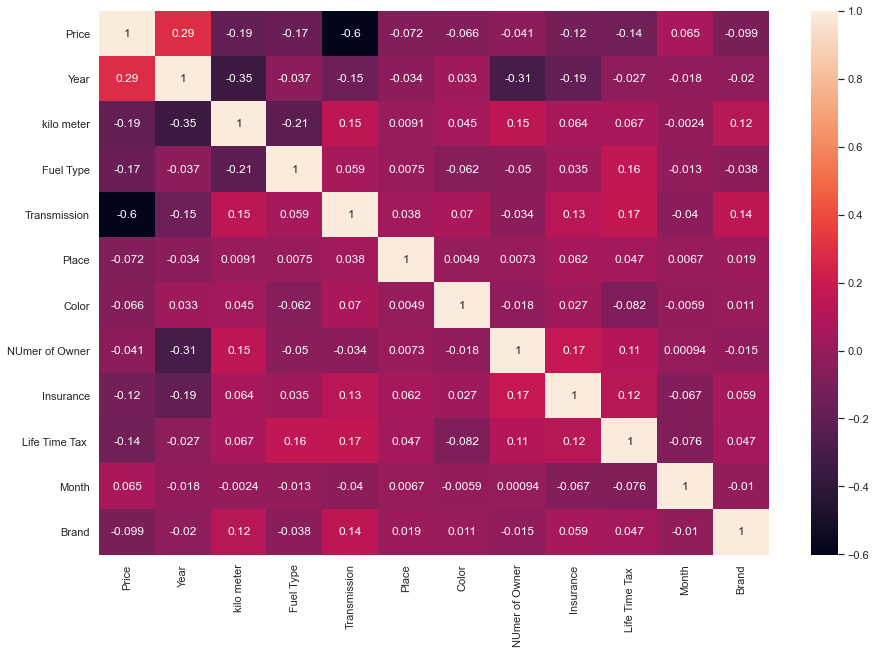

In [306]:
#checcking correlation
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)

In [ ]:
##year and transmission are most correlated with price

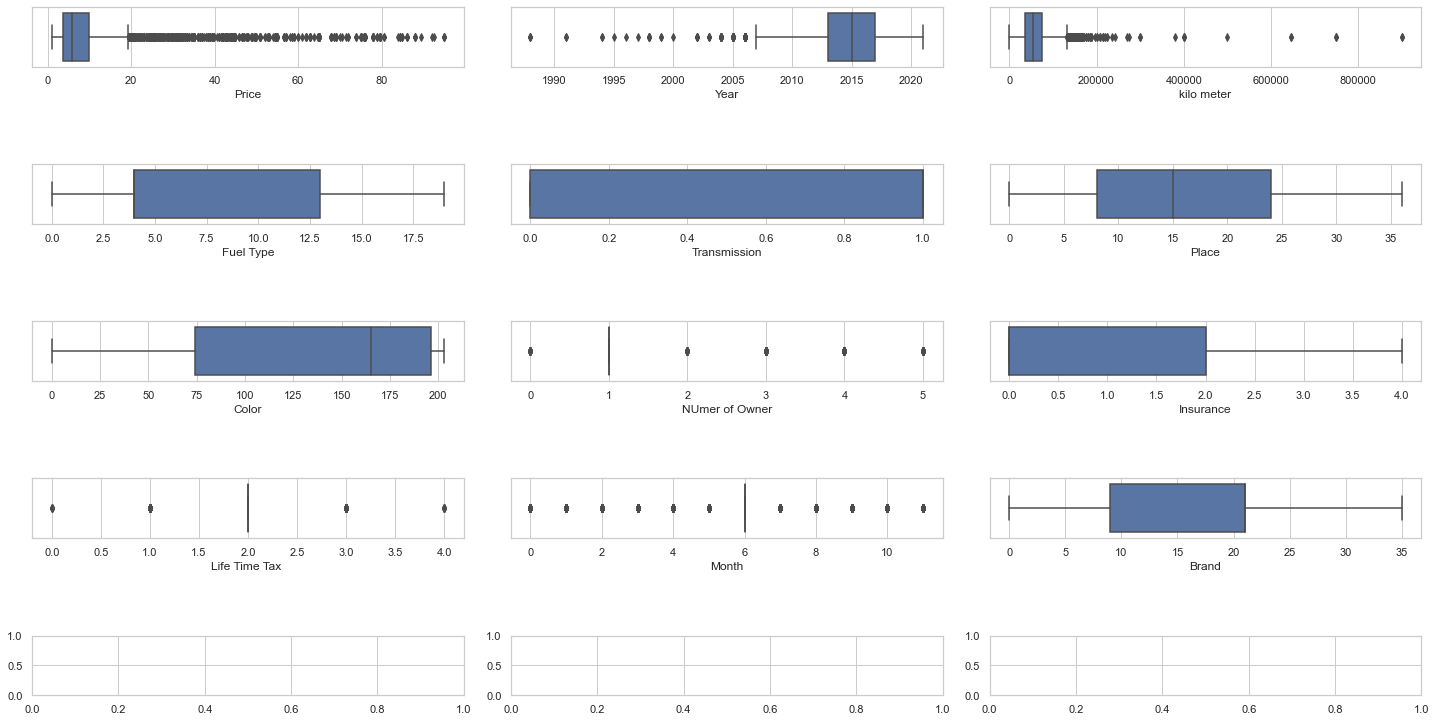

In [307]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=3,nrows=5, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [308]:
#fixing outliers
from scipy.stats import  zscore
z=np.abs(zscore(df))
d1=df[(z<3).all(axis=1)]
d1

,Price,Year,kilo meter,Fuel Type,Transmission,Place,Color,NUmer of Owner,Insurance,Life Time Tax,Month,Brand
0,3.70,2015,54000,13,1,27,74,1,0,2,6,9
1,4.50,2016,67941,15,1,27,74,3,0,2,11,21
2,19.50,2012,98000,4,0,9,196,1,2,2,6,0
3,36.91,2021,2000,4,0,9,15,1,0,2,6,6
4,2.60,2012,39000,13,1,9,165,1,0,2,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...
6379,3.50,2015,76000,4,1,31,196,1,2,2,6,19
6380,3.55,2017,35442,13,0,31,196,3,0,2,6,21
6381,8.00,2005,85000,13,1,31,19,1,2,2,6,9
6382,1.50,2012,62000,13,1,31,165,1,2,2,6,21


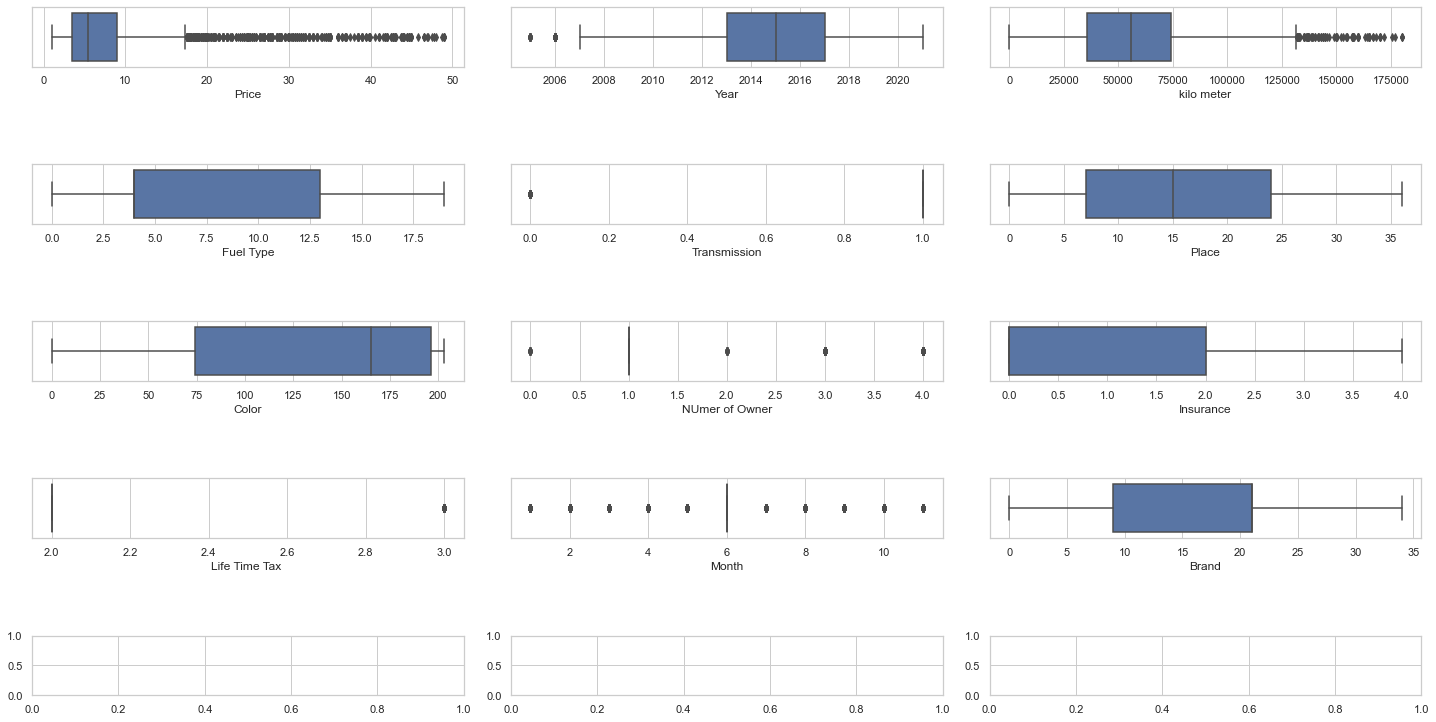

In [309]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=3,nrows=5, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in d1.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [310]:
#checking for skewness
d1.skew()

Price             2.404680
Year             -0.463251
kilo meter        0.629560
Fuel Type         0.395486
Transmission     -1.173053
Place             0.157477
Color            -0.658574
NUmer of Owner    1.428597
Insurance         0.720376
Life Time Tax     2.350587
Month            -0.008878
Brand             0.022382
dtype: float64

In [311]:
#spliting data in x and y
x=d1.drop("Price", axis=1)
x

,Year,kilo meter,Fuel Type,Transmission,Place,Color,NUmer of Owner,Insurance,Life Time Tax,Month,Brand
0,2015,54000,13,1,27,74,1,0,2,6,9
1,2016,67941,15,1,27,74,3,0,2,11,21
2,2012,98000,4,0,9,196,1,2,2,6,0
3,2021,2000,4,0,9,15,1,0,2,6,6
4,2012,39000,13,1,9,165,1,0,2,6,21
...,...,...,...,...,...,...,...,...,...,...,...
6379,2015,76000,4,1,31,196,1,2,2,6,19
6380,2017,35442,13,0,31,196,3,0,2,6,21
6381,2005,85000,13,1,31,19,1,2,2,6,9
6382,2012,62000,13,1,31,165,1,2,2,6,21


In [312]:
y=d1["Price"]
y

0        3.70
1        4.50
2       19.50
3       36.91
4        2.60
        ...  
6379     3.50
6380     3.55
6381     8.00
6382     1.50
6383     1.20
Name: Price, Length: 4990, dtype: float64

In [313]:
# treating skewness with power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#checking for skewness
df_new.skew()

Year             -0.294388
kilo meter       -0.044058
Fuel Type         0.108313
Transmission     -1.173053
Place            -0.224281
Color            -0.589041
NUmer of Owner   -0.491619
Insurance         0.381938
Life Time Tax     2.350587
Month             0.300421
Brand            -0.216837
dtype: float64

In [314]:
x=df_new

In [315]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [316]:
#spliting train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3493, 11), (3493,), (1497, 11), (1497,))

In [317]:
#creating function 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""mean squared error is:
    """,mean_squared_error(y_test, predict))
       
    print("The mean absolute error is: ", mean_absolute_error(y_test,predict))
    
    
    print("""r2 score is:
    
    """,r2_score(y_test,predict))
    
    print("cross_val_score", cross_val_score(model,x,y,cv=5).mean())

In [318]:
#LineraRegression
model(LinearRegression)

mean squared error is:
     34.85197599553511
The mean absolute error is:  3.7330420054773863
r2 score is:
    
     0.4724798224383745
cross_val_score 0.4677468494583229


In [319]:

#decisiontreeregressor
model(DecisionTreeRegressor)

mean squared error is:
     26.05254754509018
The mean absolute error is:  2.2126553106212428
r2 score is:
    
     0.6056681403464954
cross_val_score 0.545446482980817


In [320]:
#randomforestregressor
model(RandomForestRegressor)

mean squared error is:
     13.570994335053605
The mean absolute error is:  1.8996967022934756
r2 score is:
    
     0.7945891692846216
cross_val_score 0.7507319341508196


In [321]:
#extratreesreressor
model(ExtraTreesRegressor)

mean squared error is:
     14.465257120923518
The mean absolute error is:  1.8031654976619917
r2 score is:
    
     0.781053590594642
cross_val_score 0.7615751740678197


In [322]:
model(KNeighborsRegressor)

mean squared error is:
     29.82835997327989
The mean absolute error is:  3.0790273881095525
r2 score is:
    
     0.5485173709664981
cross_val_score 0.5333525604523632


In [323]:
#BaggingRegressor
model(BaggingRegressor)

mean squared error is:
     15.063253329725208
The mean absolute error is:  1.9905316983172692
r2 score is:
    
     0.7720023085012346
cross_val_score 0.7308021349405436


In [324]:
#AdaBoostRegressor
model(AdaBoostRegressor)

mean squared error is:
     34.59939689396307
The mean absolute error is:  3.6757681675608294
r2 score is:
    
     0.47630286456736914
cross_val_score 0.4590406808535238


In [325]:
#GradientBoostingRegressor
model(GradientBoostingRegressor)

mean squared error is:
     17.370856754070815
The mean absolute error is:  2.392081320044874
r2 score is:
    
     0.7370743787818822
cross_val_score 0.6999389656071532


In [326]:
#Extra Trees Regressor is the best model as the R2 score  and Cross validation score difference is minimum
#setting parameters for hyperparameter tunning
parameter={
          "criterion":['squared_error', 'mse', 'absolute_error', 'mae'],
          'max_features':['auto', 'sqrt',"log2"],
          'min_samples_split':[2, 5, 10, 15],
           'min_samples_leaf':[1, 2, 5, 10]}

In [327]:

#using GridSearchCV for Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [328]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15]})

In [329]:
#checking best parameters
gcv.best_params_

{'criterion': 'mse',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [332]:
model=ExtraTreesRegressor(criterion="mse",max_features="sqrt",min_samples_leaf=1,min_samples_split=2)
model.fit(x_train,y_train)
pred=model.predict(x_test)
    
print("""mean squared error is:
    """,mean_squared_error(y_test, pred))
       
print("The mean absolute error is: ", mean_absolute_error(y_test,pred))
    
    
print("r2 score is:" ,r2_score(y_test,pred))

mean squared error is:
     14.464845531163997
The mean absolute error is:  1.8732294923179704
r2 score is: 0.7810598204251414


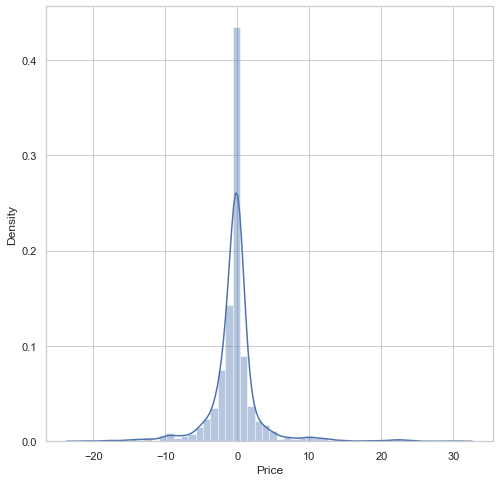

In [333]:
#plotting model distplot
plt.figure(figsize = (8,8))
sns.distplot(y_test-pred)
plt.show()